In [2]:
import os
import math as mt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
import sys

In [4]:
import sys
sys.path.append("../")

import utils.imports as imp
import utils.visuals as visu
import utils.processing as proc

In [5]:
import os
import pandas as pd
print(os.getcwd())
data = pd.read_csv("../data/saved.csv")


/home/cwolf/Documents/ENTORNOS/Clon/CienciaDatos2024-1/notebooks


In [16]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

# Assuming 'data' is your DataFrame and it has columns 'T' and 'Ondas'
# Create a scatter plot
fig = go.Figure(go.Scatter(x=data['T'], y=data['Ondas'], mode='lines'))

# Identify peaks
peaks, _ = find_peaks(data['Ondas'].values, distance=30) # Adjust distance as needed

# Identify troughs (local minima)
troughs, _ = find_peaks(-data['Ondas'].values, distance=30) # Negate the data for troughs

# Add markers for peaks
fig.add_trace(go.Scatter(
    x=data['T'].iloc[peaks],
    y=data['Ondas'].iloc[peaks],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Peaks'
))

# Add markers for troughs
fig.add_trace(go.Scatter(
    x=data['T'].iloc[troughs],
    y=data['Ondas'].iloc[troughs],
    mode='markers',
    marker=dict(
        size=8,
        color='blue',
        symbol='cross'
    ),
    name='Troughs'
))

# Show the plot
fig.show()


In [7]:
from dash import Dash, dcc, html

app = Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=True)


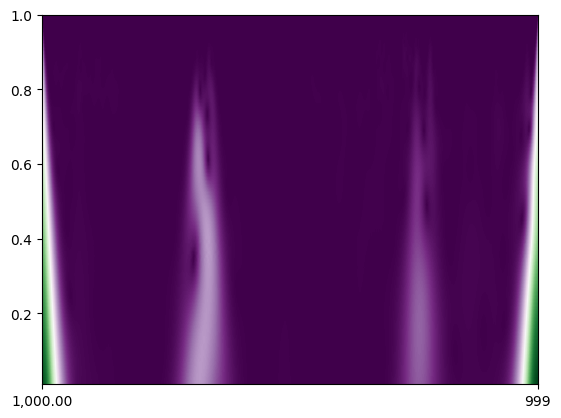

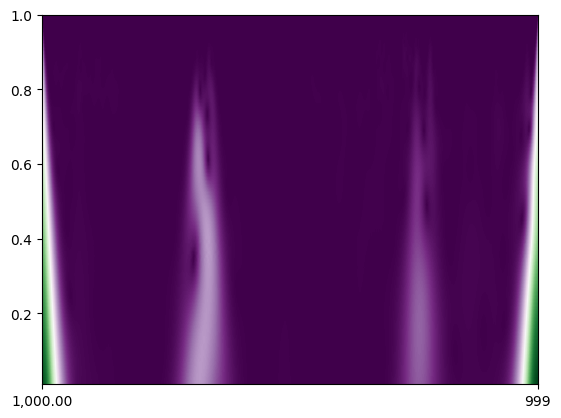

In [20]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has columns 'T' and 'Ondas'
# Identify peaks and troughs (example using find_peaks, adjust as needed)
peaks, _ = find_peaks(data['Ondas'].values, distance=30)
troughs, _ = find_peaks(-data['Ondas'].values, distance=30)

# Example: Apply CWT to the entire dataset
scales = np.arange(1, 101) # Example scales, adjust as needed
wavelet = 'cmor1.5-1.0' # Example wavelet, adjust as needed

# Apply CWT to the entire dataset
# CWT is a complex-valued function, so we take the absolute value to get the magnitude
cwtmatr, freqs = pywt.cwt(data['Ondas'].values, scales, wavelet, sampling_period=1)

# Convert complex numbers to real numbers by taking the absolute value
cwtmatr_abs = np.abs(cwtmatr)

# Plot the CWT
plt.imshow(cwtmatr_abs, extent=[data['T'].min(), data['T'].max(), freqs.min(), freqs.max()], aspect='auto', cmap='PRGn')
plt.show()

# Example: Analyze the CWT coefficients for a specific peak
# Assuming you want to analyze the first peak
peak_index = peaks[10]

# You might want to focus on the frequency content around the peak
# This could involve selecting a window around the peak index and analyzing the CWT coefficients in that window
# For demonstration, let's plot the CWT coefficients for the entire dataset
plt.imshow(cwtmatr_abs, extent=[data['T'].min(), data['T'].max(), freqs.min(), freqs.max()], aspect='auto', cmap='PRGn')
plt.show()
